In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import seaborn as sns
p = np.array([1/6,1/3,1/3,1/6])
n_indiv = 200
n_haplotypes = 2*n_indiv
haplotype_config = [[0,0],[0,1],[1,0],[1,1]]
haplotype_count_dict = {'[0,0]':0,'[0,1]':0, '[1,0]':0, '[1,1]':0}
max_iter = 1000
def count_g(genotype,i,j,ph):
    n0000 = genotype[0,0,0,0];
    n0001 = genotype[0,0,1,0]+genotype[0,0,1,0]
    n0100 = genotype[1,0,0,0]+genotype[0,1,0,0]
    n0101 = genotype[1,0,1,0]+genotype[0,1,0,1] + genotype[0,1,1,0] + genotype[1,0,0,1]
    n0111 = genotype[1,0,1,1]+genotype[0,1,1,1]
    n1101 = genotype[1,1,1,0]+genotype[1,1,0,1]
    n0011 = genotype[0,0,1,1]
    n1111 = genotype[1,1,1,1]
    n1100 = genotype[1,1,0,0]
    d = ph[0,0]*ph[1,1]+ph[0,1]*ph[1,0]
    if(i==0 and j==0):
        return 2*n0000+n0001+n0100+n0101*(ph[0,0]*ph[1,1]/d)
    elif(i==0 and j==1):
        return 2*n0011+n0001+n0111+n0101*(ph[0,1]*ph[1,0]/d)
    elif(i==1 and j==0):
        return 2*n1100+n1101+n0100+n0101*(ph[0,1]*ph[1,0]/d)
    else:
        return 2*n1111+n1101+n0111+n0101*(ph[0,0]*ph[1,1]/d) 
norms = []
for i in range(1,max_iter):
    assign_hap = np.random.choice(4, n_haplotypes ,p=p)
    config = []
    for ah in assign_hap:
        config.append(haplotype_config[ah])

    genotype = np.zeros((2,2,2,2))
    #for j in range(0,n_haplotypes-1):
    #    genotype[config[j][0], config[j][1], config[j+1][0], config[j+1][1]]+=1
    genotype[0,0,0,0] = 10
    genotype[0,0,0,1] = 15
    genotype[0,0,1,1] = 5
    genotype
    n0 = np.ones((2,2))*n_indiv/2
    ph = np.zeros((2,2))
    pnew = n0/n_haplotypes
    while (LA.norm(ph.flatten()-pnew.flatten(),2)>1e-6):
        n0[0,0] = count_g(genotype,0,0,pnew)
        n0[0,1] = count_g(genotype,0,1,pnew)
        n0[1,0] = count_g(genotype,1,0,pnew)
        n0[1,1] = count_g(genotype,1,1,pnew)
        ph = pnew
        pnew = n0/n_haplotypes
    norms.append(LA.norm(ph.flatten()-pnew.flatten(),2))

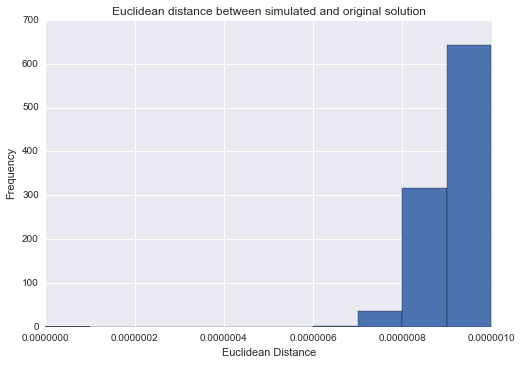

In [2]:
plt.hist(norms)
plt.xlabel('Euclidean Distance')
plt.ylabel('Frequency')
plt.title('Euclidean distance between simulated and original solution')

In [3]:
genotype

array([[[[ 14.,  21.],
         [ 27.,   6.]],

        [[ 25.,  37.],
         [ 45.,  22.]]],


       [[[ 20.,  50.],
         [ 47.,  24.]],

        [[  8.,  22.],
         [ 22.,   9.]]]])

In [4]:
n0

array([[ 244.26612735,  173.73387265],
       [ 166.73387265,  225.26612735]])